# 1.数据操作

In [1]:
# type: ignore
import torch
import numpy as np
import d2l
print("jupyter!!")

jupyter!!


In [3]:
# 创建张量，和一些性质
x = torch.tensor([0, 1, 2, 3, 4, 5])
print(x)
print(x.shape) # 张量的形状
print(x.numel()) # 元素个数
x = x.reshape(2, -1) # 改变张量的形状，而不改变元素个数和值
print(x)

tensor([0, 1, 2, 3, 4, 5])
torch.Size([6])
6
tensor([[0, 1, 2],
        [3, 4, 5]])


In [4]:
# 创建特殊张量
zero_tensor = torch.zeros((2, 3, 4)) # 创建一个形状为(2, 3, 4)的张量，元素全为0
print(zero_tensor)
random_tensor = torch.rand(2, 3, 4) # 创建一个形状为(2, 3, 4)的张量，元素为随机数
print(random_tensor)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])
tensor([[[0.3276, 0.7091, 0.8824, 0.7187],
         [0.2174, 0.1456, 0.4742, 0.5235],
         [0.7655, 0.9086, 0.9988, 0.9625]],

        [[0.2522, 0.4946, 0.9434, 0.3422],
         [0.4718, 0.1914, 0.6259, 0.6639],
         [0.9885, 0.6121, 0.9193, 0.2796]]])


In [5]:
# 运算
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
print(x + y, x - y, x * y, x / y, x ** y) # 加减乘除乘方
z = torch.exp(x) # 指数运算
print(z)    


tensor([ 3.,  4.,  6., 10.]) tensor([-1.,  0.,  2.,  6.]) tensor([ 2.,  4.,  8., 16.]) tensor([0.5000, 1.0000, 2.0000, 4.0000]) tensor([ 1.,  4., 16., 64.])
tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])


In [6]:
# 连接张量
x = torch.arange(6, dtype=torch.int).reshape(3, 2)
y = torch.tensor([[2, 1], [1, 2], [4, 3]])
print(torch.cat((x, y), dim=0), "\n", torch.cat((x, y), dim=1)) # 按行和按列连接
# 这里的dim=0表示按行连接，dim=1表示按列连接

# 对张量进行求和
print(x.sum(axis=0), x.sum(axis=1), x.sum()) # 按?求和，按?求和, 所有元素和

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [2, 1],
        [1, 2],
        [4, 3]]) 
 tensor([[0, 1, 2, 1],
        [2, 3, 1, 2],
        [4, 5, 4, 3]])
tensor([6, 9]) tensor([1, 5, 9]) tensor(15)


In [7]:
# 广播机制，要知道怎么拓展的
a = torch.arange(3).reshape(3, 1)
b = torch.arange(2).reshape(1, 2)
print(a, "\n", b)
print(a + b) # 广播机制，a和b的维度不同，但是可以相加


tensor([[0],
        [1],
        [2]]) 
 tensor([[0, 1]])
tensor([[0, 1],
        [1, 2],
        [2, 3]])


In [8]:
# 转换为NumPy张量
A = x.numpy()
B = torch.tensor(A)
print(type(A), type(B))
# 将大小为1的张量转换为Python标量
a = torch.tensor([3.5])
print(a, a.item(), int(a), float(a))

<class 'numpy.ndarray'> <class 'torch.Tensor'>
tensor([3.5000]) 3.5 3 3.5


# 2.数据预处理

In [2]:
# 创建数据
import pandas as pd
import os
os.makedirs(os.path.join('.', 'data'), exist_ok=True)
data_file = os.path.join('.', 'data', 'house_tiny.csv')
with open(data_file, 'w')as f:
    f.write('NumRooms,Alley,Price\n') # 列名
    f.write('NA,Pave,127500\n') # 每行表示一个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

# 读取数据
data = pd.read_csv(data_file)
print(data)

# 处理缺失值
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = pd.get_dummies(inputs, dummy_na=True) # 特征视为类别
inputs = inputs.astype('float32') # 这里必须要把上一步转化为的布尔型转化成float形
print(inputs)
inputs = inputs.fillna(inputs.mean()) # 再填充缺失值
print(inputs)

# 现在inputs和outputs都是数值类型，可以转化为张量格式
x, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
print(x, "\n", y)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000
   NumRooms  Alley_Pave  Alley_nan
0       NaN         1.0        0.0
1       2.0         0.0        1.0
2       4.0         0.0        1.0
3       NaN         0.0        1.0
   NumRooms  Alley_Pave  Alley_nan
0       3.0         1.0        0.0
1       2.0         0.0        1.0
2       4.0         0.0        1.0
3       3.0         0.0        1.0
tensor([[3., 1., 0.],
        [2., 0., 1.],
        [4., 0., 1.],
        [3., 0., 1.]]) 
 tensor([127500, 106000, 178100, 140000])


# 3.线性代数

In [3]:
A = torch.arange(9, dtype=torch.float32).reshape(3, 3)
print(A), print(A.T) # 打印A和A的转置
print(A == A.T) # 判断A和A的转置是否相等
print(A.mean(), A.sum() / A.numel()) # 判断A的均值是否等于A的和除以元素个数
L2 = torch.norm(A) # 计算A的L2范数
print(L2)
L1 = torch.abs(A).sum() # 计算A的L1范数
print(L1)
print(torch.norm(torch.ones(4, 9))) # 计算张量的范数

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])
tensor([[0., 3., 6.],
        [1., 4., 7.],
        [2., 5., 8.]])
tensor([[ True, False, False],
        [False,  True, False],
        [False, False,  True]])
tensor(4.) tensor(4.)
tensor(14.2829)
tensor(36.)
tensor(6.)


# 4.微积分
讲了一些链式法则，复合函数求导之类的
特别的，有一个<u,v>内积的求导
向量求导，矩阵求导，分子分母的区别等等，建议要用链式法则换元展开
# 5.自动微分
计算图

In [4]:
# 对y = 2XT*X进行求导（这个T是转置）
import torch 

x = torch.arange(4.0, requires_grad=(True)) # 为了有地方存储梯度，需要设置requires_grad
print(x.grad) # 梯度为None
y = 2 * torch.dot(x, x) # 计算y
print(y) 
y.backward() # 对y进行求导
print(x.grad) # 梯度为4*x

# 默认情况下，PyTorch会累积梯度，我们需要清除之前的值
x.grad.zero_() # 注释掉的话，梯度会累积，最后结果就是tensor([ 1.,  5.,  9., 13.])
y = x.sum() # 对x求和
y.backward() # 反向传播
print(x.grad) # 梯度为1

# 深度学习中，我们一般不对矩阵求导
x.grad.zero_()
y = x * x # 此时y是一个向量
print(y)
y.sum().backward() # 对y求和再求导,等价于y.backward(torch.ones(len(x)))
print(x.grad) # 梯度为2*x

# 下面是一个detach的用法
x.grad.zero_()
y = x * x
u = y.detach() # 从计算图中分离y, 把y当成常数
z = u * x
z.sum().backward()
print(x.grad == u)
# 但是此时，y和u是不同的，因为u是从y中分出来的
# y是x的函数，而u不是x的函数，u是y的函数
x.grad.zero_()
y.sum().backward()
print(x.grad == 2 * x)

# python控制流（条件、循环和函数）仍然可以用计算梯度
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

print(a.grad == d / a) #f(a)是a的分段线性函数，则d=f(a)=ka，梯度就是k，k=d/a



None
tensor(28., grad_fn=<MulBackward0>)
tensor([ 0.,  4.,  8., 12.])
tensor([1., 1., 1., 1.])
tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>)
tensor([0., 2., 4., 6.])
tensor([True, True, True, True])
tensor([True, True, True, True])
tensor(True)


# 6.线性回归
可以用作房价预测
线性模型可以看成单层神经网络

# 优化算法：
梯度下降
小批量梯度下降（深度学习默认）：求一次梯度，要把整个数据过一遍，所以可以挑b个样本
批量大小不能太小，因为每次计算量太小，不适合并行来利用资源
不能太大，gpu显存消耗增加，可能浪费计算

yield就是continue版本的return


features: tensor([0.2980, 0.7405]) 
label: tensor([2.2776])
tensor([[ 1.1861, -1.9672],
        [ 0.1313,  1.3663],
        [ 1.7177,  0.7540],
        [-1.3610, -1.4188],
        [-0.5966,  0.3700],
        [-0.0966, -0.3072],
        [-1.2041,  0.7147],
        [ 0.3508,  0.8918],
        [ 0.3875, -0.6194],
        [ 0.1726, -0.3980]]) 
 tensor([[13.2752],
        [-0.1801],
        [ 5.0690],
        [ 6.3245],
        [ 1.7516],
        [ 5.0579],
        [-0.6591],
        [ 1.8740],
        [ 7.0867],
        [ 5.9003]])


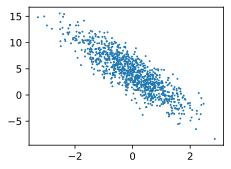

In [14]:
# 线性回归从零开始实现
%matplotlib inline
import random
import torch
from d2l import torch as d2l

def synthetic_data(w, b, num_examples): # 生成数据
    """生成 y = Xw + b + 噪声。"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
print('features:', features[0], '\nlabel:', labels[0])
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), 
                labels.detach().numpy(), 1)

# 定义一个data_iter函数，该函数接收批量大小、特征矩阵和标签向量作为输入，生成大小为batch_size的小批量
def data_iter(batch_size, features, labels): # 读取数据
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break


In [15]:
# 定义初始化模型参数
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1, requires_grad=True)
"""线性回归模型"""
# 定义模型
def linreg(X,w,b):
    return torch.matmul(X,w)+b
# 定义损失函数
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2
# 定义优化算法
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in  params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()
# 训练过程
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size, features, labels):
        l = loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l =loss(net(features,w,b),labels)
        print(f'epoch {epoch+1}, loss {float(train_l.mean()):f}')
print(f'w的估计误差:{true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差:{true_b - b}')

    

epoch 1, loss 0.038750
epoch 2, loss 0.000147
epoch 3, loss 0.000051
w的估计误差:tensor([0.0009, 0.0004], grad_fn=<SubBackward0>)
b的估计误差:tensor([0.0002], grad_fn=<RsubBackward1>)


In [17]:
'''线性回归的简洁实现'''
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w,true_b,1000)

# 调用框架中现有的api来读取数据
def load_array(data_arrays, batch_size, is_train=True):
    # 构造一个pytorch数据迭代器
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset,batch_size,shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)

next(iter(data_iter))

# 使用框架的预定义好的层
from torch import nn
net = nn.Sequential(nn.Linear(2,1))
# 初始化模型参数
net[0].weight.data.normal_(0,0.01)
net[0].bias.data.fill_(0)
# 使用均方误差
loss = nn.MSELoss()
# 实例化sgd实例
trainer = torch.optim.SGD(net.parameters(), lr=0.03)
# 训练
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')


epoch 1, loss 0.000245
epoch 2, loss 0.000098
epoch 3, loss 0.000098


# 7 softmax回归
虽然叫回归，但是是多类分类
回归是估计一个连续值
分类是预测一个离散类别
像mnist手写数字识别，就是10类分类，ImageNet就是1000类的分类问题
将人类蛋白质显微镜分类28类，又比如将恶意软件分成9个类别，评论分类
这种都是分类问题
引入softmax，求每个类的预测置信度
交叉熵损失，衡量概率与标号的区别
# 损失函数
均方损失
绝对值损失


In [15]:
"""图像分类数据集---fashion-MNIST数据集"""
%matplotlib inline
import torch
import torchvision
from torch.utils import data 
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()
# 通过框架中内置函数将fashion-mnist数据集下载并读入到内存中
trans = transforms.ToTensor()
mnist_train=torchvision.datasets.FashionMNIST(root="../data",train=True,transform=trans,download=True)
mnist_test=torchvision.datasets.FashionMNIST(root="../data",train=False,transform=trans,download=True)
len(mnist_train), len(mnist_test)
# 定义两个函数可视化
def get_fashion_mnist_labels(labels):
    pass
def show_images(imgs, num_rows,num_cols,titles=None,sclae=1.5):
    pass

# 读取一个小批量数据
batch_size = 256
def get_dataloader_workers():
    # 使用4个进程来读取数据
    return 4
train_iter = data.DataLoader(mnist_train, batch_size,shuffle=True,num_workers=get_dataloader_workers())
timer = d2l.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'9.21 sec'

In [21]:
# 定义load_data_fasion_mnist函数
def load_data_fasion_mnist(batch_size, resize=None):
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0,transforms.Resieze(resize))
        trans = transforms.Compose(trans)
    mnist_train=torchvision.datasets.FashionMNIST(root="../data",train=True,transform=trans,download=True)
    mnist_test=torchvision.datasets.FashionMNIST(root="../data",train=False,transform=trans,download=True)
    return (data.DataLoader(mnist_train, batch_size,shuffle=True,num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size,shuffle=True,num_workers=get_dataloader_workers()))

In [ ]:
"""softmax从0开始实现"""
import torch 
from IPython import display
from d2l import torch as d2l

batch_size = 256
